# HC model for brain applied to unhealthy

- Applying the 55 CpG site HC model to Alzheimer's and Huntington's patients
- The 55 common sites were found in unhealthy_wholeblood_top_100xgboost notebook and saved to the file being read in called brain_shared_healthy_unhealthy
- The unhealthy data was processed in brain_load_data.ipynb and saved to hunt_brain_55.csv for Huntington's patients and alz_brain_55.csv for Alzheimer's patients



In [19]:
import _pickle as cPickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

### Reading in data

In [20]:
huntingtons_df=pd.read_csv('hunt_brain_55.csv',index_col=0)  

In [21]:
alzheimers_df=pd.read_csv('alz_brain_55.csv',index_col=0)  

### Reading in models

In [22]:
mod_55_brain = pd.read_pickle(r'brain_55_cpgs/mod_55_brain')

In [23]:
mod_lasso_55_brain = pd.read_pickle(r'brain_55_cpgs/mod_lasso_55_brain')

In [24]:
mod_ridge_55_brain = pd.read_pickle(r'brain_55_cpgs/mod_ridge_55_brain')

In [25]:
XG_55_brain = pd.read_pickle(r'brain_55_cpgs/XG_55_brain')

### Re-ordering columns

- The CpG sites need to be in the order they are in the HC dataset

In [26]:
brain_order = XG_55_brain.get_booster().feature_names

In [27]:
#reordering alzheimer's columns
alzheimers_df = alzheimers_df[['AGE']+brain_order]
alzheimers_df

,AGE,cg01066472,cg18514820,cg21182694,cg11236550,cg24369989,cg15731815,cg04845871,cg15341124,cg16367511,...,cg06829968,cg23595055,cg04098194,cg15463803,cg24441324,cg14911690,cg07227926,cg25090514,cg23995914,cg03169557
GSM1068826,88.0,0.512,0.082,0.243,0.026,0.713,0.169,0.017,0.220,0.044,...,0.091,0.972,0.004,0.140,0.846,0.088,0.060,0.086,0.176,0.969
GSM1068827,92.0,0.519,0.116,0.265,0.019,0.554,0.187,0.029,0.199,0.125,...,0.098,0.959,0.004,0.123,0.811,0.094,0.060,0.094,0.289,0.997
GSM1068829,93.0,0.620,0.141,0.329,0.028,0.617,0.226,0.019,0.199,0.193,...,0.120,0.968,0.002,0.147,0.819,0.082,0.060,0.114,0.241,0.999
GSM1068832,96.0,0.549,0.135,0.317,0.040,0.626,0.187,0.012,0.170,0.290,...,0.058,0.980,0.003,0.136,0.871,0.106,0.066,0.121,0.214,0.986
GSM1068833,86.0,0.287,0.101,0.236,0.028,0.679,0.125,0.017,0.156,0.189,...,0.066,0.981,0.005,0.111,0.863,0.055,0.060,0.077,0.171,0.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2809015,57.0,0.374,0.057,0.204,0.156,0.471,0.061,0.115,0.202,0.179,...,0.118,0.938,0.022,0.133,0.841,0.148,0.069,0.178,0.332,0.952
GSM1546395,64.0,0.375,0.152,0.171,0.045,NaN,0.070,0.047,0.244,0.099,...,0.113,0.970,0.022,0.139,NaN,0.229,0.064,0.161,0.292,0.979
GSM2809020,63.0,0.445,0.053,0.214,0.150,0.482,0.094,0.083,0.282,0.112,...,0.120,0.920,0.024,0.152,0.883,0.150,0.186,0.159,0.343,0.965
GSM2809021,53.0,0.359,0.119,0.186,0.224,0.438,0.088,0.088,0.224,0.174,...,0.109,0.874,0.033,0.128,0.852,0.166,0.080,0.157,0.307,0.843


In [28]:
#reordering huntington's columns
huntingtons_df = huntingtons_df[['AGE']+brain_order]
huntingtons_df

,AGE,cg01066472,cg18514820,cg21182694,cg11236550,cg24369989,cg15731815,cg04845871,cg15341124,cg16367511,...,cg06829968,cg23595055,cg04098194,cg15463803,cg24441324,cg14911690,cg07227926,cg25090514,cg23995914,cg03169557
GSM1871451,83.0,0.432,0.076,0.221,0.135,0.489,0.352,0.019,0.270,0.166,...,0.135,0.981,0.016,0.121,0.926,0.173,0.084,0.164,0.367,0.988
GSM1871457,48.0,0.554,0.085,0.227,0.192,0.409,0.167,0.070,0.182,0.126,...,0.039,0.968,0.025,0.107,0.909,0.126,0.079,0.128,0.267,0.946
GSM1871498,51.0,0.248,0.057,0.239,0.207,0.436,0.118,0.055,0.184,0.170,...,0.119,0.914,0.018,0.109,0.920,0.199,0.083,0.133,0.269,0.934
GSM1871545,65.0,0.470,0.077,0.311,0.157,0.423,0.180,0.056,0.195,0.177,...,0.116,0.954,0.021,0.109,0.888,0.205,0.098,0.164,0.318,0.966
GSM1871590,67.0,0.586,0.071,0.186,0.133,0.464,0.238,0.049,0.212,0.189,...,0.055,0.964,0.017,0.115,0.881,0.165,0.089,0.148,0.343,0.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1871672,83.0,0.452,0.132,0.237,0.034,0.529,0.137,0.026,0.265,0.154,...,0.105,0.965,0.015,0.132,0.918,0.164,0.151,0.153,0.335,0.993
GSM1871818,73.0,0.566,0.149,0.193,0.193,0.463,0.102,0.043,0.215,0.127,...,0.106,0.954,0.015,0.133,0.877,0.168,0.084,0.166,0.312,0.960
GSM1871821,41.0,0.281,0.075,0.146,0.146,0.432,0.058,0.062,0.175,0.133,...,0.057,0.958,0.011,0.106,0.935,0.161,0.081,0.053,0.197,0.972
GSM1871866,45.0,0.490,0.164,0.134,0.146,0.405,0.049,0.044,0.164,0.113,...,0.029,0.934,0.017,0.110,0.959,0.130,0.085,0.048,0.260,0.949


# Dealing with NAs

### Alzheimer's

In [29]:
nas=alzheimers_df.isnull().sum()
col_means=alzheimers_df.mean(axis=0)

na_cols=[]
na_cols_means=[]

for i in range(len(nas)):
    if nas[i]!=0:        
        na_cols.append(nas.keys()[i])
        na_cols_means.append(col_means[i])


In [30]:
alz_ids=list(alzheimers_df.index)
for i in alz_ids:
    for j in range(len(na_cols)):
        if str(alzheimers_df.loc[i][na_cols[j]])=="nan":
            alzheimers_df.loc[i][na_cols[j]]=na_cols_means[j]

In [31]:
alzheimers_df.isnull().sum()

AGE           0
cg01066472    0
cg18514820    0
cg21182694    0
cg11236550    0
cg24369989    0
cg15731815    0
cg04845871    0
cg15341124    0
cg16367511    0
cg18008766    0
cg11018337    0
cg23352942    0
cg17104258    0
cg06022942    0
cg02746869    0
cg15393490    0
cg13327545    0
cg04739123    0
cg26118408    0
cg13806070    0
cg19622662    0
cg00807959    0
cg04834794    0
cg17179314    0
cg12765028    0
cg07907745    0
cg04897644    0
cg10533159    0
cg24079702    0
cg23091758    0
cg00927231    0
cg00303378    0
cg08715791    0
cg07303143    0
cg23606718    0
cg17117277    0
cg11823178    0
cg17801546    0
cg19451698    0
cg26102082    0
cg15907146    0
cg26830108    0
cg22454769    0
cg24668570    0
cg04347477    0
cg06829968    0
cg23595055    0
cg04098194    0
cg15463803    0
cg24441324    0
cg14911690    0
cg07227926    0
cg25090514    0
cg23995914    0
cg03169557    0
dtype: int64

### Huntington's

In [32]:
nas_hunt=huntingtons_df.isnull().sum()
col_means_hunt=huntingtons_df.mean(axis=0)

na_cols_hunt=[]
na_cols_means_hunt=[]

for i in range(len(nas_hunt)):
    if nas_hunt[i]!=0:        
        na_cols_hunt.append(nas_hunt.keys()[i])
        na_cols_means_hunt.append(col_means_hunt[i])


In [33]:
hunt_ids=list(huntingtons_df.index)
for i in hunt_ids:
    for j in range(len(na_cols_hunt)):
        if str(huntingtons_df.loc[i][na_cols_hunt[j]])=="nan":
            huntingtons_df.loc[i][na_cols_hunt[j]]=na_cols_means_hunt[j]

In [34]:
huntingtons_df.isnull().sum()

AGE           0
cg01066472    0
cg18514820    0
cg21182694    0
cg11236550    0
cg24369989    0
cg15731815    0
cg04845871    0
cg15341124    0
cg16367511    0
cg18008766    0
cg11018337    0
cg23352942    0
cg17104258    0
cg06022942    0
cg02746869    0
cg15393490    0
cg13327545    0
cg04739123    0
cg26118408    0
cg13806070    0
cg19622662    0
cg00807959    0
cg04834794    0
cg17179314    0
cg12765028    0
cg07907745    0
cg04897644    0
cg10533159    0
cg24079702    0
cg23091758    0
cg00927231    0
cg00303378    0
cg08715791    0
cg07303143    0
cg23606718    0
cg17117277    0
cg11823178    0
cg17801546    0
cg19451698    0
cg26102082    0
cg15907146    0
cg26830108    0
cg22454769    0
cg24668570    0
cg04347477    0
cg06829968    0
cg23595055    0
cg04098194    0
cg15463803    0
cg24441324    0
cg14911690    0
cg07227926    0
cg25090514    0
cg23995914    0
cg03169557    0
dtype: int64

## Alzheimer's 

In [35]:
X_alz = alzheimers_df.iloc[:, 1:].to_numpy()
y_alz = alzheimers_df[['AGE']].astype(float).astype(int)

### Linear Regression

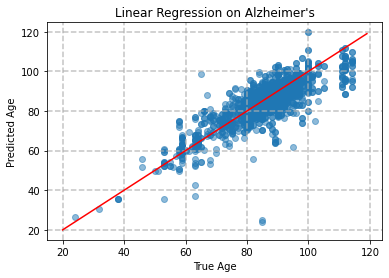

The rms on the Alzheimers data is 7.352 years
The r^2 on the Alzheimers data is 0.630


In [39]:
#model is: mod_56_whole_blood 

# Make predictions and evaluate
preds_alz = mod_55_brain .predict(X_alz)
rms_alz = sqrt(mean_squared_error(y_alz, preds_alz))
r2_alz = r2_score(y_alz, preds_alz)

# Plot 

plt.scatter(y_alz, preds_alz, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Linear Regression on Alzheimer's")
plt.show()
    
# print metric
print(f'The rms on the Alzheimers data is {rms_alz:.3f} years')
print(f'The r^2 on the Alzheimers data is {r2_alz:.3f}')


### Lasso

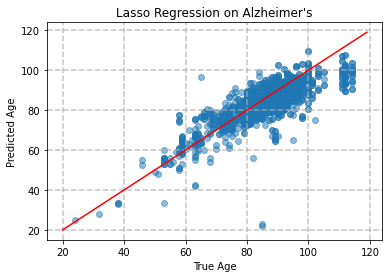

The rms on the Alzheimers data is 7.309 years
The r^2 on the Alzheimers data is 0.634


In [41]:
#model is: mod_lasso_56_whole_blood 

# Make predictions and evaluate
preds_lasso_alz = mod_lasso_55_brain .predict(X_alz)
rms_lasso_alz = sqrt(mean_squared_error(y_alz, preds_lasso_alz))
r2_lasso_alz = r2_score(y_alz, preds_lasso_alz)

# Plot 

plt.scatter(y_alz, preds_lasso_alz, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Lasso Regression on Alzheimer's")
plt.show()
    
# print metric
print(f'The rms on the Alzheimers data is {rms_lasso_alz:.3f} years')
print(f'The r^2 on the Alzheimers data is {r2_lasso_alz:.3f}')


### Ridge

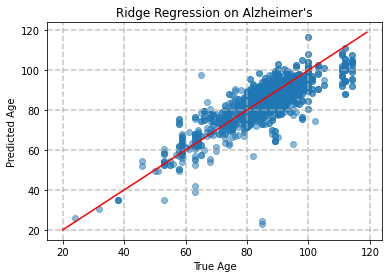

The rms on the Alzheimers data is 7.226 years
The r^2 on the Alzheimers data is 0.643


In [42]:
#model is: mod_ridge_56_whole_blood 

# Make predictions and evaluate
preds_ridge_alz = mod_ridge_55_brain .predict(X_alz)
rms_ridge_alz = sqrt(mean_squared_error(y_alz, preds_ridge_alz))
r2_ridge_alz = r2_score(y_alz, preds_ridge_alz)

# Plot 

plt.scatter(y_alz, preds_ridge_alz, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Ridge Regression on Alzheimer's")
plt.show()
    
# print metric
print(f'The rms on the Alzheimers data is {rms_ridge_alz:.3f} years')
print(f'The r^2 on the Alzheimers data is {r2_ridge_alz:.3f}')


## Huntington's 

In [43]:
X_park = huntingtons_df.iloc[:, 1:].to_numpy()
y_park = huntingtons_df[['AGE']].astype(float).astype(int)

### Linear Regression

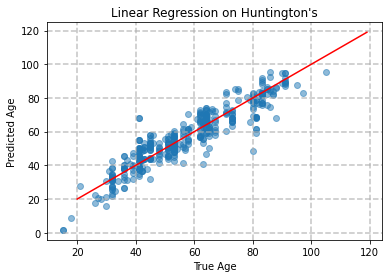

The rms on the Huntingtons data is 6.764 years
The r^2 on the Huntingtons data is 0.850


In [45]:
#model is: mod_56_whole_blood 

# Make predictions and evaluate
preds_park = mod_55_brain .predict(X_park)
rms_park = sqrt(mean_squared_error(y_park, preds_park))
r2_park = r2_score(y_park, preds_park)

# Plot 

plt.scatter(y_park, preds_park, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Linear Regression on Huntington's")
plt.show()
    
# print metric
print(f'The rms on the Huntingtons data is {rms_park:.3f} years')
print(f'The r^2 on the Huntingtons data is {r2_park:.3f}')


### Lasso

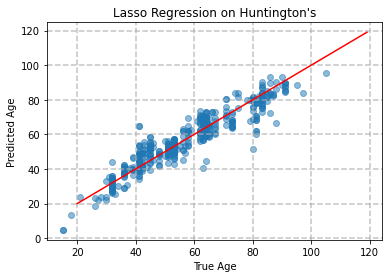

The rms on the Huntingtons data is 6.182 years
The r^2 on the Huntingtons data is 0.875


In [47]:
#model is: mod_lasso_56_whole_blood 

# Make predictions and evaluate
preds_lasso_park = mod_lasso_55_brain .predict(X_park)
rms_lasso_park = sqrt(mean_squared_error(y_park, preds_lasso_park))
r2_lasso_park = r2_score(y_park, preds_lasso_park)

# Plot 

plt.scatter(y_park, preds_lasso_park, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Lasso Regression on Huntington's")
plt.show()
    
# print metric
print(f'The rms on the Huntingtons data is {rms_lasso_park:.3f} years')
print(f'The r^2 on the Huntingtons data is {r2_lasso_park:.3f}')


### Ridge

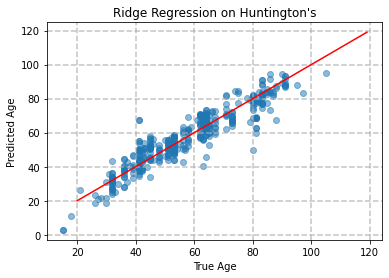

The rms on the Huntingtons data is 6.440 years
The r^2 on the Huntingtons data is 0.864


In [49]:
#model is: mod_ridge_56_whole_blood 

# Make predictions and evaluate
preds_ridge_park = mod_ridge_55_brain .predict(X_park)
rms_ridge_park = sqrt(mean_squared_error(y_park, preds_ridge_park))
r2_ridge_park = r2_score(y_park, preds_ridge_park)

# Plot 

plt.scatter(y_park, preds_ridge_park, alpha=0.5)
plt.plot(range(20,120), range(20,120), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("Ridge Regression on Huntington's")
plt.show()
    
# print metric
print(f'The rms on the Huntingtons data is {rms_ridge_park:.3f} years')
print(f'The r^2 on the Huntingtons data is {r2_ridge_park:.3f}')


# Saving the non-na data

In [51]:
alzheimers_df.to_csv('alz_55_no_na.csv', encoding='utf-8', index=True)

In [52]:
huntingtons_df.to_csv('hunt_55_no_na.csv', encoding='utf-8', index=True)

## XGBoost

In [148]:
xgb_order=XG_56_whole_blood.get_booster().feature_names
#ln=['cg23078123', 'cg02933228', 'cg00329615', 'cg25410668', 'cg01256539', 'cg16054275', 'cg07418114', 'cg09692396', 'cg16932827', 'cg03607117', 'cg06977935', 'cg01552919', 'cg07927379', 'cg22285878', 'cg00292135', 'cg18343474', 'cg02046143', 'cg03883331', 'cg22454769', 'cg08453194', 'cg09809672', 'cg24724428', 'cg06540876', 'cg04875128', 'cg22452230', 'cg22193924', 'cg23606718', 'cg06784991', 'cg18933331', 'cg01074797', 'cg25256723', 'cg26614073', 'cg18877361', 'cg03404339', 'cg24079702', 'cg20273670', 'cg23744638', 'cg07955995', 'cg26113593', 'cg12252865', 'cg04503319', 'cg07553761', 'cg16867657', 'cg10221746', 'cg19344626', 'cg14692377', 'cg20532418', 'cg23091758', 'cg05308819', 'cg04573078', 'cg00776080', 'cg07181952', 'cg05093315', 'cg00535618', 'cg04208403', 'cg06639320']
#xgb_order=ln
alzheimers_df_xgb = alzheimers_df[['AGE']+xgb_order]
alzheimers_df_xgb


,AGE,cg16867657,cg04875128,cg07553761,cg00292135,cg09809672,cg04208403,cg22454769,cg06639320,cg19344626,...,cg26614073,cg14692377,cg18343474,cg26113593,cg00535618,cg04503319,cg05308819,cg05093315,cg07181952,cg22193924
GSM1069225,81.0,0.772,0.364,0.391,0.147,0.431,0.545,0.655,0.530,0.631,...,0.436,0.257,0.144,0.755,0.712,0.502,0.491,0.660,0.617,0.830
GSM1069226,88.0,0.778,0.409,0.367,0.158,0.356,0.540,0.705,0.606,0.515,...,0.419,0.193,0.156,0.821,0.717,0.466,0.422,0.590,0.612,0.742
GSM1069227,91.0,0.839,0.429,0.329,0.174,0.414,0.547,0.639,0.538,0.347,...,0.291,0.228,0.154,0.807,0.671,0.537,0.461,0.673,0.635,0.847
GSM1069228,87.0,0.773,0.367,0.343,0.211,0.502,0.547,0.684,0.559,0.713,...,0.482,0.260,0.143,0.813,0.710,0.572,0.484,0.613,0.678,0.814
GSM1069229,89.0,0.822,0.325,0.392,0.144,0.287,0.428,0.667,0.587,0.256,...,0.284,0.227,0.327,0.754,0.738,0.367,0.402,0.481,0.540,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1870611,75.9,0.695,0.139,0.311,0.149,0.337,0.484,0.552,0.513,0.607,...,0.394,0.151,0.140,0.769,0.727,0.556,0.437,0.621,0.610,0.814
GSM3035793,80.0,0.670,0.319,0.350,0.139,0.400,0.535,0.701,0.549,0.592,...,0.409,0.217,0.193,0.706,0.671,0.466,0.443,0.565,0.590,0.700
GSM1870291,75.9,0.695,0.139,0.311,0.149,0.337,0.484,0.552,0.513,0.607,...,0.394,0.151,0.140,0.769,0.727,0.556,0.437,0.621,0.610,0.814
GSM1299778,70.0,0.729,0.233,0.383,0.125,0.356,0.566,0.607,0.527,0.479,...,0.409,0.174,0.099,0.750,0.756,0.530,0.506,0.599,0.671,0.787


In [154]:
X_alz_xgb = alzheimers_df_xgb.iloc[:, 1:].astype(float).to_numpy()
y_alz_xgb = alzheimers_df_xgb[['AGE']].astype(float).astype(int).to_numpy()



#X_alz_xgb.to_csv('alzheimers_df_xgb.csv', encoding='utf-8', index=True)

In [159]:
X_alz_xgb

array([[0.772, 0.364, 0.391, ..., 0.66 , 0.617, 0.83 ],
       [0.778, 0.409, 0.367, ..., 0.59 , 0.612, 0.742],
       [0.839, 0.429, 0.329, ..., 0.673, 0.635, 0.847],
       ...,
       [0.695, 0.139, 0.311, ..., 0.621, 0.61 , 0.814],
       [0.729, 0.233, 0.383, ..., 0.599, 0.671, 0.787],
       [0.813, 0.332, 0.431, ..., 0.656, 0.637, 0.803]])

In [150]:
dtest = xgb.DMatrix('alzheimers_df_xgb.csv?format=csv&label_column=1')

In [156]:
valid = xgb.DMatrix(data=X_alz_xgb,label=y_alz_xgb)

In [165]:
#model is: XG_56_whole_blood

# Make predictions and evaluate
preds_xg_alz = XG_56_whole_blood2.predict(X_alz_xgb)
rms_xg_alz = sqrt(mean_squared_error(y_alz_xgb, preds_xg_alz))
r2_xg_alz = r2_score(y_alz_xgb, preds_xg_alz)

# Plot 

plt.scatter(y_alz_xgb, preds_xg_alz, alpha=0.5)
plt.plot(range(40,100), range(40,100), c='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.title("XGBoost on Alzheimer's")
plt.show()
    
# print metric
print(f'The rms on the Alzheimers data is {rms_xg_alz:.3f} years')
print(f'The r^2 on the Alzheimers data is {r2_xg_alz:.3f}')


ValueError: feature_names mismatch: ['cg16867657', 'cg04875128', 'cg07553761', 'cg00292135', 'cg09809672', 'cg04208403', 'cg22454769', 'cg06639320', 'cg19344626', 'cg02046143', 'cg23606718', 'cg08453194', 'cg23744638', 'cg07927379', 'cg24724428', 'cg23078123', 'cg16932827', 'cg10221746', 'cg18877361', 'cg03607117', 'cg09692396', 'cg06784991', 'cg23091758', 'cg02933228', 'cg01552919', 'cg00329615', 'cg03883331', 'cg16054275', 'cg12252865', 'cg22285878', 'cg03404339', 'cg24079702', 'cg20273670', 'cg00776080', 'cg06540876', 'cg25410668', 'cg07955995', 'cg01074797', 'cg22452230', 'cg07418114', 'cg18933331', 'cg01256539', 'cg06977935', 'cg20532418', 'cg04573078', 'cg25256723', 'cg26614073', 'cg14692377', 'cg18343474', 'cg26113593', 'cg00535618', 'cg04503319', 'cg05308819', 'cg05093315', 'cg07181952', 'cg22193924'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55']
expected cg23078123, cg02933228, cg00329615, cg25410668, cg01256539, cg16054275, cg07418114, cg09692396, cg16932827, cg03607117, cg06977935, cg01552919, cg07927379, cg22285878, cg00292135, cg18343474, cg02046143, cg03883331, cg22454769, cg08453194, cg09809672, cg24724428, cg06540876, cg04875128, cg22452230, cg22193924, cg23606718, cg06784991, cg18933331, cg01074797, cg25256723, cg26614073, cg18877361, cg03404339, cg24079702, cg20273670, cg23744638, cg07955995, cg26113593, cg12252865, cg04503319, cg07553761, cg16867657, cg10221746, cg19344626, cg14692377, cg20532418, cg23091758, cg05308819, cg04573078, cg00776080, cg07181952, cg05093315, cg00535618, cg04208403, cg06639320 in input data
training data did not have the following fields: f23, f0, f54, f5, f32, f14, f6, f3, f4, f10, f52, f30, f41, f50, f39, f33, f18, f53, f34, f35, f22, f48, f26, f55, f36, f11, f19, f38, f7, f24, f44, f25, f15, f45, f20, f46, f51, f16, f13, f37, f17, f27, f40, f47, f21, f28, f49, f8, f1, f9, f29, f31, f42, f2, f12, f43

In [137]:
ln=['cg23078123', 'cg02933228', 'cg00329615', 'cg25410668', 'cg01256539', 'cg16054275', 'cg07418114', 'cg09692396', 'cg16932827', 'cg03607117', 'cg06977935', 'cg01552919', 'cg07927379', 'cg22285878', 'cg00292135', 'cg18343474', 'cg02046143', 'cg03883331', 'cg22454769', 'cg08453194', 'cg09809672', 'cg24724428', 'cg06540876', 'cg04875128', 'cg22452230', 'cg22193924', 'cg23606718', 'cg06784991', 'cg18933331', 'cg01074797', 'cg25256723', 'cg26614073', 'cg18877361', 'cg03404339', 'cg24079702', 'cg20273670', 'cg23744638', 'cg07955995', 'cg26113593', 'cg12252865', 'cg04503319', 'cg07553761', 'cg16867657', 'cg10221746', 'cg19344626', 'cg14692377', 'cg20532418', 'cg23091758', 'cg05308819', 'cg04573078', 'cg00776080', 'cg07181952', 'cg05093315', 'cg00535618', 'cg04208403', 'cg06639320']

In [163]:
XG_56_whole_blood.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}